In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
from windrose import WindroseAxes

In [ ]:
df = pd.read_csv('T1.csv')

In [ ]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
#checking if the dataframe contains null
df.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

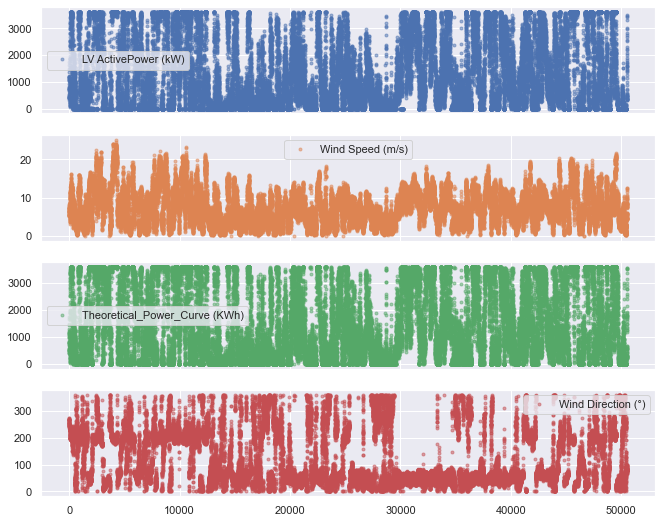

In [ ]:
#plotting each data
cols_plot = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)','Wind Direction (°)']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

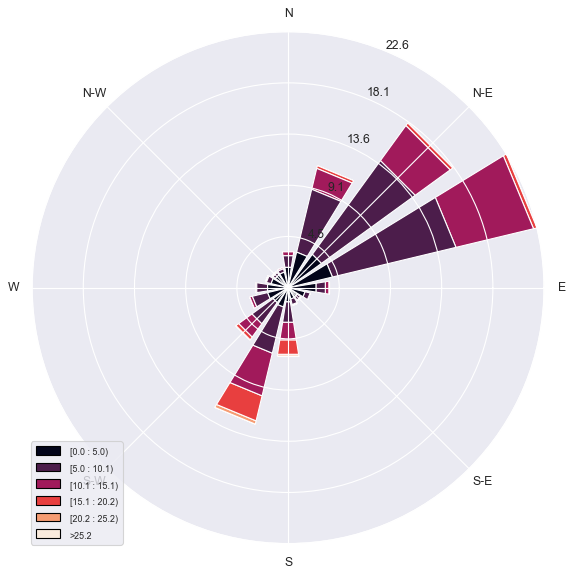

In [ ]:
# Create wind speed and direction variables
ax = WindroseAxes.from_ax()
ax.bar(df['Wind Direction (°)'], df['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [ ]:
#Checking for maximum and minimum value of the wind direction to help in choosing the right binning value
print(df['Wind Direction (°)'].max())
print(df['Wind Direction (°)'].min())

359.997589111328
0.0


In [ ]:
print(df.shape)

(50530, 5)


In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['YEAR'] = df['Date/Time'].dt.year
df['MONTH'] = df['Date/Time'].dt.month
df['DAY'] = df['Date/Time'].dt.day
df['hour'] = df['Date/Time'].dt.hour

In [ ]:
df = df.drop(['Date/Time'], axis=1)

In [ ]:
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),YEAR,MONTH,DAY,hour
0,380.047791,5.311336,416.328908,259.994904,2018,1,1,0
1,453.769196,5.672167,519.917511,268.641113,2018,1,1,0
2,306.376587,5.216037,390.900016,272.564789,2018,1,1,0
3,419.645905,5.659674,516.127569,271.258087,2018,1,1,0
4,380.650696,5.577941,491.702972,265.674286,2018,1,1,0


In [ ]:
df.isnull().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
YEAR                             0
MONTH                            0
DAY                              0
hour                             0
dtype: int64

In [ ]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print(len(out))

iqr_outliers(df['LV ActivePower (kW)'])
iqr_outliers(df['Theoretical_Power_Curve (KWh)'])
iqr_outliers(df['Wind Direction (°)'])

0
0
0


In [ ]:
from sklearn.model_selection import train_test_split
X= df.drop(['Wind Speed (m/s)'] , axis = 1).values
y= df['Wind Speed (m/s)' ].values

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size= 0.25 , random_state=42)

## Decision Tree

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor()
Regressor.fit(x_train, y_train)
yhat = Regressor.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.171


In [ ]:
from sklearn.metrics import r2_score
R2_Decision_Tree = r2_score(y_test,yhat)
print('R2: %.3f' %R2_Decision_Tree)
print(Regressor.score(x_train, y_train))

R2: 0.986
0.9999996299339289


In [ ]:
ACC_Decision=Regressor.score(x_test, y_test)
print(Regressor.score(x_test, y_test))

0.9863494157118996


## LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)
yhat = linear.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 1.014


In [ ]:
print(linear.score(x_train, y_train))

0.895044860243821


## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(x_train, y_train )
yhat = forest_model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.172


In [ ]:
R2_Random_Forest = r2_score(y_test,yhat)
print('R2: %.3f' %R2_Random_Forest)
print(forest_model.score(x_train, y_train))

R2: 0.988
0.9906104949708103


In [ ]:
ACC_Random_Forest=Regressor.score(x_test, y_test)
print(forest_model.score(x_test, y_test))

0.9882060114960934


## XGBRegressor

In [ ]:

from xgboost.sklearn import XGBRegressor
xgbRegressor = XGBRegressor()
xgbRegressor.fit(x_train, y_train)
yhat = xgbRegressor.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.180


In [ ]:
R2_XGB = r2_score(y_test,yhat)
print('R2: %.3f' %R2_XGB)

R2: 0.990


In [ ]:
print(xgbRegressor.score(x_train, y_train))

0.9948977373685924


In [ ]:
ACC_XGB=xgbRegressor.score(x_test, y_test)
print(xgbRegressor.score(x_test, y_test))

0.9900116112087407


## BayesianRidge

In [ ]:
from sklearn.linear_model import BayesianRidge

brRegressor = BayesianRidge()
brRegressor.fit(x_train, y_train)
yhat = brRegressor.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 1.014


In [ ]:
print(brRegressor.score(x_train, y_train))

0.8950445458312554


## Neural Networks

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [ ]:
model = Sequential([
    Dense(10,kernel_initializer = 'normal',input_shape = (7,),activation = 'relu'),
    Dense(25,kernel_initializer = 'normal',activation = 'relu'),
    Dense(25,kernel_initializer = 'normal',activation = 'relu'),
    Dense(10,kernel_initializer = 'normal',activation = 'relu'),
    Dense(1,kernel_initializer = 'normal',activation = 'linear')
])

model.compile(
    loss = 'mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                80        
                                                                 
 dense_11 (Dense)            (None, 25)                275       
                                                                 
 dense_12 (Dense)            (None, 25)                650       
                                                                 
 dense_13 (Dense)            (None, 10)                260       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,276
Trainable params: 1,276
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import types
import tempfile
import keras.models

def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            keras.models.save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = { 'model_str': model_str }
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = keras.models.load_model(fd.name)
        self.__dict__ = model.__dict__


    cls = keras.models.Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__
    
make_keras_picklable()

In [ ]:
# Import pickle Package

import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "pickle_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://8e16d664-34b5-4278-a430-bde9d38b8053/assets


In [ ]:
y_pred = model.predict(x_test)

395/395 [==============================] - 1s 1ms/step


In [ ]:
y_pred[y_pred<0] = 0

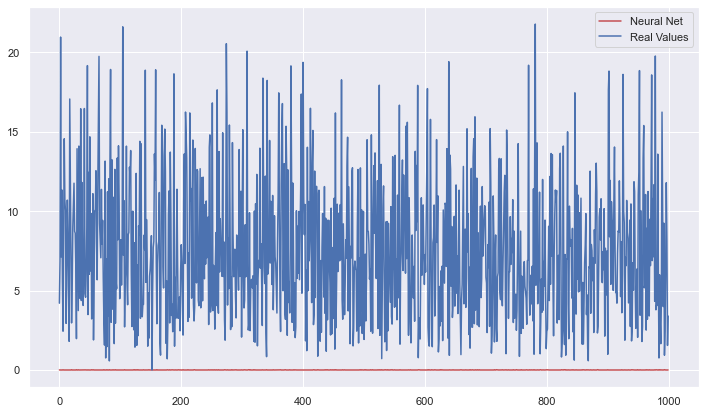

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(y_pred[-1000:],'r',label='Neural Net')
plt.plot(y_test[-1000:],'b',label='Real Values')
#plt.plot(nik,'g',label='Time series')
plt.legend()
plt.show()

In [ ]:
y_pred

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.00473442],
       [0.00083308]], dtype=float32)

In [ ]:
y_test

array([11.63276005, 10.34597015,  6.43061781, ...,  8.16519165,
        1.547611  ,  3.39585996])

In [ ]:
data = pd.read_csv("T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


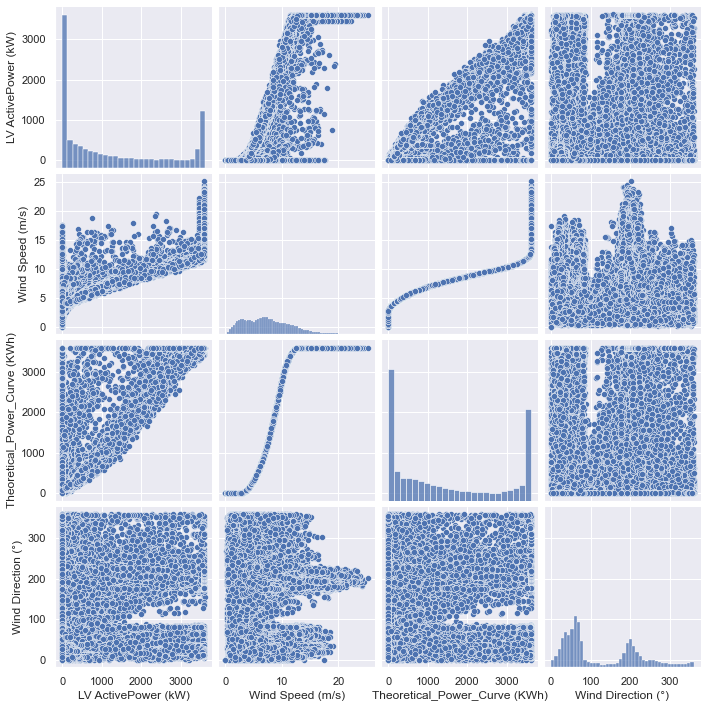

In [ ]:
# Pair Plot correlation between all attributes
sns.pairplot(data)

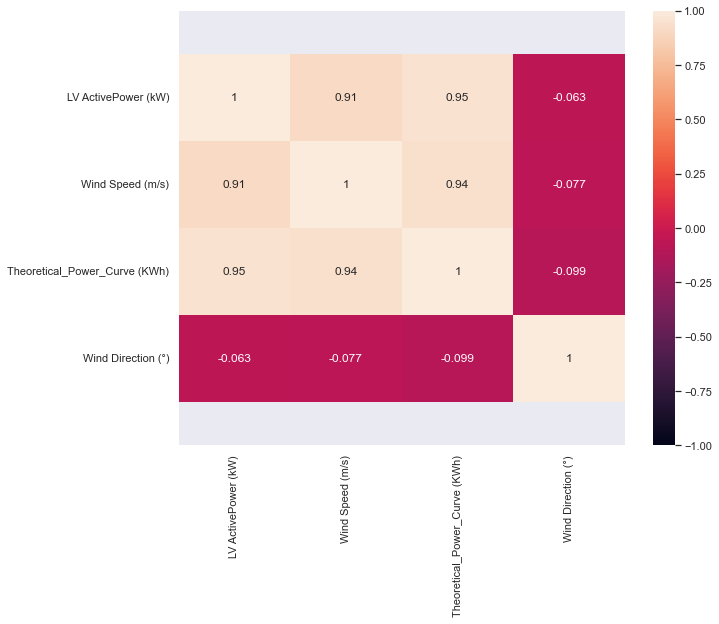

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [ ]:
#correlation between the values
corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [ ]:
# Spliting the date time in year, month, days, hours and minutes
import time
data['Year']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[0])
data['Month']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
data['Day']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
data['Time_Hours']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
data['Time_Minutes']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30


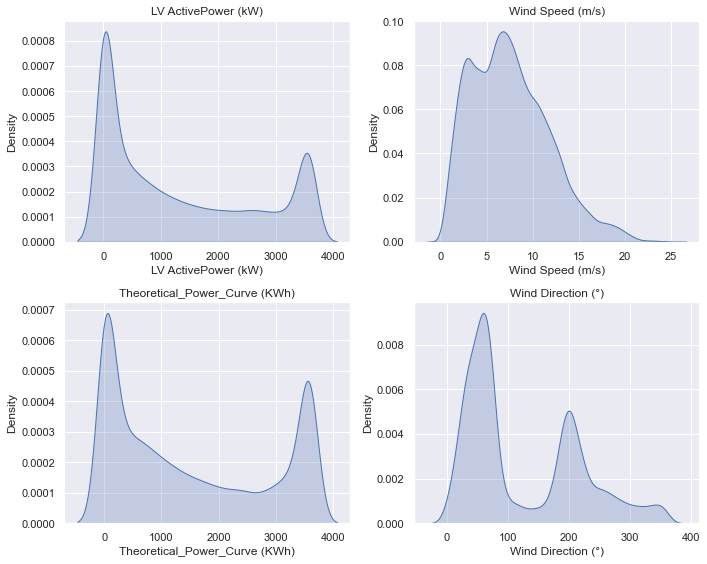

In [ ]:
## KDE Plot
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

In [ ]:
# droping all the null values from the data
data = data.dropna()

In [ ]:
## Converting the Data/Time feature in proper DateTime format
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40


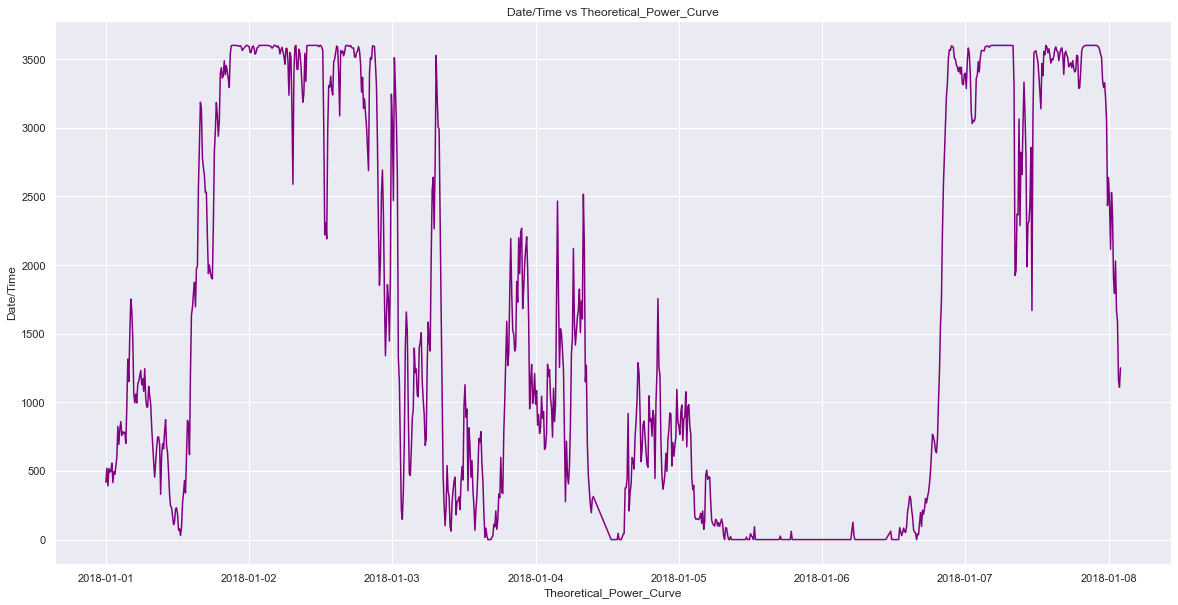

In [ ]:
##Line Graph of DateTime VS Target variable
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [ ]:
# Droping all the irrelavent features that dosent affect the target variable.
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


In [ ]:
df = data.copy()

In [ ]:
### Building the LSTM model
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [ ]:
# converting the Data/Time as the index for proper shape of the input.
df = df.set_index('Date/Time')
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [ ]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [ ]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [ ]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [ ]:
del df['LV ActivePower (kW)']
del df['Wind Speed (m/s)']
df.head()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-01-01 00:00:00,416.328908
2018-01-01 00:10:00,519.917511
2018-01-01 00:20:00,390.900016
2018-01-01 00:30:00,516.127569
2018-01-01 00:40:00,491.702972


In [ ]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-12-31 21:30:00,1811.263260
2018-12-31 21:40:00,1787.100338
2018-12-31 21:50:00,2777.504103
2018-12-31 22:00:00,3025.199012
2018-12-31 22:10:00,3161.693967


In [ ]:
# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)

In [ ]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [ ]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [ ]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [ ]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

49519/49519 [==============================] - 166s 3ms/step - loss: 0.0055


In [ ]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 [==============================] - 2s 2s/step
Hour=1, Predicted=3604.724769, Expected=3600.000000
1/1 [==============================] - 0s 23ms/step
Hour=2, Predicted=3607.401668, Expected=3600.000000
1/1 [==============================] - 0s 41ms/step
Hour=3, Predicted=3608.242109, Expected=3600.000000
1/1 [==============================] - 0s 33ms/step
Hour=4, Predicted=3608.264842, Expected=2506.112948
1/1 [==============================] - 0s 27ms/step
Hour=5, Predicted=2514.229354, Expected=1954.282949
1/1 [==============================] - 0s 33ms/step
Hour=6, Predicted=1962.232820, Expected=1128.684225
1/1 [==============================] - 0s 32ms/step
Hour=7, Predicted=1136.442765, Expected=2087.002742
1/1 [==============================] - 0s 36ms/step
Hour=8, Predicted=2094.683130, Expected=1497.144149
1/1 [==============================] - 0s 31ms/step
Hour=9, Predicted=1504.674494, Expected=3143.880909
1/1 [==============================] - 0s 32ms/step
Hour=10, Predi

1/1 [==============================] - 0s 32ms/step
Hour=79, Predicted=1273.274024, Expected=1349.485359
1/1 [==============================] - 0s 30ms/step
Hour=80, Predicted=1356.215015, Expected=1979.156533
1/1 [==============================] - 0s 31ms/step
Hour=81, Predicted=1985.886190, Expected=2697.981442
1/1 [==============================] - 0s 31ms/step
Hour=82, Predicted=2704.711104, Expected=3263.367927
1/1 [==============================] - 0s 31ms/step
Hour=83, Predicted=3270.097598, Expected=3146.717940
1/1 [==============================] - 0s 32ms/step
Hour=84, Predicted=3153.447610, Expected=3018.130808
1/1 [==============================] - 0s 32ms/step
Hour=85, Predicted=3024.860478, Expected=3300.665177
1/1 [==============================] - 0s 31ms/step
Hour=86, Predicted=3307.394850, Expected=2747.927256
1/1 [==============================] - 0s 32ms/step
Hour=87, Predicted=2754.656931, Expected=2590.529143
1/1 [==============================] - 0s 30ms/step
Hou

Hour=156, Predicted=1245.574515, Expected=2436.504152
1/1 [==============================] - 0s 31ms/step
Hour=157, Predicted=2443.233796, Expected=1829.369330
1/1 [==============================] - 0s 30ms/step
Hour=158, Predicted=1836.098975, Expected=2808.873842
1/1 [==============================] - 0s 32ms/step
Hour=159, Predicted=2815.603487, Expected=2443.197451
1/1 [==============================] - 0s 32ms/step
Hour=160, Predicted=2449.927096, Expected=1807.169085
1/1 [==============================] - 0s 30ms/step
Hour=161, Predicted=1813.898730, Expected=3128.215862
1/1 [==============================] - 0s 31ms/step
Hour=162, Predicted=3134.945507, Expected=2663.481637
1/1 [==============================] - 0s 30ms/step
Hour=163, Predicted=2670.211279, Expected=3013.534684
1/1 [==============================] - 0s 29ms/step
Hour=164, Predicted=3020.264327, Expected=2699.478367
1/1 [==============================] - 0s 20ms/step
Hour=165, Predicted=2706.208011, Expected=2512

1/1 [==============================] - 0s 31ms/step
Hour=235, Predicted=725.792107, Expected=490.146742
1/1 [==============================] - 0s 33ms/step
Hour=236, Predicted=496.876390, Expected=274.252958
1/1 [==============================] - 0s 25ms/step
Hour=237, Predicted=280.982606, Expected=194.784678
1/1 [==============================] - 0s 31ms/step
Hour=238, Predicted=201.514326, Expected=403.764000
1/1 [==============================] - 0s 31ms/step
Hour=239, Predicted=410.493645, Expected=126.788167
1/1 [==============================] - 0s 30ms/step
Hour=240, Predicted=133.517811, Expected=126.351038
1/1 [==============================] - 0s 32ms/step
Hour=241, Predicted=133.080683, Expected=124.229530
1/1 [==============================] - 0s 33ms/step
Hour=242, Predicted=130.959178, Expected=126.556187
1/1 [==============================] - 0s 31ms/step
Hour=243, Predicted=133.285831, Expected=177.237514
1/1 [==============================] - 0s 31ms/step
Hour=244, Pr

1/1 [==============================] - 0s 30ms/step
Hour=315, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 31ms/step
Hour=316, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 32ms/step
Hour=317, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 27ms/step
Hour=318, Predicted=6.729648, Expected=56.056234
1/1 [==============================] - 0s 31ms/step
Hour=319, Predicted=62.785883, Expected=47.921508
1/1 [==============================] - 0s 33ms/step
Hour=320, Predicted=54.651156, Expected=80.975877
1/1 [==============================] - 0s 30ms/step
Hour=321, Predicted=87.705526, Expected=227.808563
1/1 [==============================] - 0s 32ms/step
Hour=322, Predicted=234.538212, Expected=216.293668
1/1 [==============================] - 0s 32ms/step
Hour=323, Predicted=223.023316, Expected=99.450182
1/1 [==============================] - 0s 31ms/step
Hour=324, Predicted=106.179830, E

1/1 [==============================] - 0s 31ms/step
Hour=395, Predicted=150.400314, Expected=187.244605
1/1 [==============================] - 0s 31ms/step
Hour=396, Predicted=193.974250, Expected=64.917083
1/1 [==============================] - 0s 24ms/step
Hour=397, Predicted=71.646728, Expected=187.870575
1/1 [==============================] - 0s 31ms/step
Hour=398, Predicted=194.600218, Expected=201.007355
1/1 [==============================] - 0s 30ms/step
Hour=399, Predicted=207.736997, Expected=184.030788
1/1 [==============================] - 0s 29ms/step
Hour=400, Predicted=190.760432, Expected=79.627599
1/1 [==============================] - 0s 30ms/step
Hour=401, Predicted=86.357243, Expected=123.053612
1/1 [==============================] - 0s 31ms/step
Hour=402, Predicted=129.783258, Expected=117.692995
1/1 [==============================] - 0s 31ms/step
Hour=403, Predicted=124.422643, Expected=25.324509
1/1 [==============================] - 0s 32ms/step
Hour=404, Predict

1/1 [==============================] - 0s 33ms/step
Hour=476, Predicted=127.593033, Expected=84.183055
1/1 [==============================] - 0s 31ms/step
Hour=477, Predicted=90.912703, Expected=34.667256
1/1 [==============================] - 0s 30ms/step
Hour=478, Predicted=41.396901, Expected=19.277590
1/1 [==============================] - 0s 30ms/step
Hour=479, Predicted=26.007234, Expected=66.324557
1/1 [==============================] - 0s 28ms/step
Hour=480, Predicted=73.054202, Expected=74.693847
1/1 [==============================] - 0s 31ms/step
Hour=481, Predicted=81.423492, Expected=72.321338
1/1 [==============================] - 0s 31ms/step
Hour=482, Predicted=79.050983, Expected=63.858789
1/1 [==============================] - 0s 33ms/step
Hour=483, Predicted=70.588435, Expected=100.209648
1/1 [==============================] - 0s 32ms/step
Hour=484, Predicted=106.939295, Expected=56.202585
1/1 [==============================] - 0s 31ms/step
Hour=485, Predicted=62.9322

1/1 [==============================] - 0s 31ms/step
Hour=556, Predicted=955.363885, Expected=742.110533
1/1 [==============================] - 0s 32ms/step
Hour=557, Predicted=748.840181, Expected=593.137412
1/1 [==============================] - 0s 30ms/step
Hour=558, Predicted=599.867061, Expected=452.311322
1/1 [==============================] - 0s 31ms/step
Hour=559, Predicted=459.040970, Expected=331.252788
1/1 [==============================] - 0s 31ms/step
Hour=560, Predicted=337.982437, Expected=130.656787
1/1 [==============================] - 0s 29ms/step
Hour=561, Predicted=137.386435, Expected=131.175428
1/1 [==============================] - 0s 30ms/step
Hour=562, Predicted=137.905076, Expected=122.732663
1/1 [==============================] - 0s 31ms/step
Hour=563, Predicted=129.462311, Expected=171.008031
1/1 [==============================] - 0s 31ms/step
Hour=564, Predicted=177.737679, Expected=213.822070
1/1 [==============================] - 0s 31ms/step
Hour=565, Pr

1/1 [==============================] - 0s 29ms/step
Hour=635, Predicted=1002.363710, Expected=1558.790998
1/1 [==============================] - 0s 32ms/step
Hour=636, Predicted=1565.520642, Expected=1969.359867
1/1 [==============================] - 0s 31ms/step
Hour=637, Predicted=1976.089513, Expected=1825.485977
1/1 [==============================] - 0s 32ms/step
Hour=638, Predicted=1832.215625, Expected=1391.861688
1/1 [==============================] - 0s 31ms/step
Hour=639, Predicted=1398.591336, Expected=1119.469782
1/1 [==============================] - 0s 31ms/step
Hour=640, Predicted=1126.199431, Expected=1318.743444
1/1 [==============================] - 0s 31ms/step
Hour=641, Predicted=1325.473092, Expected=939.665447
1/1 [==============================] - 0s 32ms/step
Hour=642, Predicted=946.395095, Expected=1304.488383
1/1 [==============================] - 0s 32ms/step
Hour=643, Predicted=1311.218031, Expected=1054.911142
1/1 [==============================] - 0s 31ms/s

Hour=713, Predicted=1715.927181, Expected=1820.803194
1/1 [==============================] - 0s 30ms/step
Hour=714, Predicted=1827.532838, Expected=1202.808589
1/1 [==============================] - 0s 30ms/step
Hour=715, Predicted=1209.538233, Expected=1107.823445
1/1 [==============================] - 0s 32ms/step
Hour=716, Predicted=1114.553090, Expected=877.685315
1/1 [==============================] - 0s 33ms/step
Hour=717, Predicted=884.414960, Expected=765.340036
1/1 [==============================] - 0s 31ms/step
Hour=718, Predicted=772.069682, Expected=1427.767684
1/1 [==============================] - 0s 32ms/step
Hour=719, Predicted=1434.497330, Expected=1408.261175
1/1 [==============================] - 0s 33ms/step
Hour=720, Predicted=1414.990820, Expected=1531.260701
1/1 [==============================] - 0s 30ms/step
Hour=721, Predicted=1537.990346, Expected=1896.246296
1/1 [==============================] - 0s 30ms/step
Hour=722, Predicted=1902.975941, Expected=1434.984

Hour=793, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 32ms/step
Hour=794, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 29ms/step
Hour=795, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 26ms/step
Hour=796, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 31ms/step
Hour=797, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 31ms/step
Hour=798, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 30ms/step
Hour=799, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 31ms/step
Hour=800, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 30ms/step
Hour=801, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 33ms/step
Hour=802, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step
Hour=875, Predicted=120.387987, Expected=275.435709
1/1 [==============================] - 0s 32ms/step
Hour=876, Predicted=282.165357, Expected=152.097165
1/1 [==============================] - 0s 32ms/step
Hour=877, Predicted=158.826813, Expected=0.000000
1/1 [==============================] - 0s 31ms/step
Hour=878, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 31ms/step
Hour=879, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 19ms/step
Hour=880, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 30ms/step
Hour=881, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 31ms/step
Hour=882, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 29ms/step
Hour=883, Predicted=6.729648, Expected=0.000000
1/1 [==============================] - 0s 26ms/step
Hour=884, Predicted=6.729648, Expected

1/1 [==============================] - 0s 33ms/step
Hour=956, Predicted=229.207908, Expected=409.420042
1/1 [==============================] - 0s 35ms/step
Hour=957, Predicted=416.149687, Expected=586.118854
1/1 [==============================] - 0s 34ms/step
Hour=958, Predicted=592.848498, Expected=570.018207
1/1 [==============================] - 0s 32ms/step
Hour=959, Predicted=576.747852, Expected=652.381931
1/1 [==============================] - 0s 31ms/step
Hour=960, Predicted=659.111576, Expected=590.510937
1/1 [==============================] - 0s 32ms/step
Hour=961, Predicted=597.240582, Expected=456.513723
1/1 [==============================] - 0s 32ms/step
Hour=962, Predicted=463.243366, Expected=637.553372
1/1 [==============================] - 0s 32ms/step
Hour=963, Predicted=644.283014, Expected=1340.607690
1/1 [==============================] - 0s 35ms/step
Hour=964, Predicted=1347.337334, Expected=1715.429019
1/1 [==============================] - 0s 33ms/step
Hour=965,

In [ ]:
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 10)                   1400      
                                                                 
 dense_15 (Dense)            (1, 1)                    11        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### Calculating Mean Absolute Error
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.46196866956486027


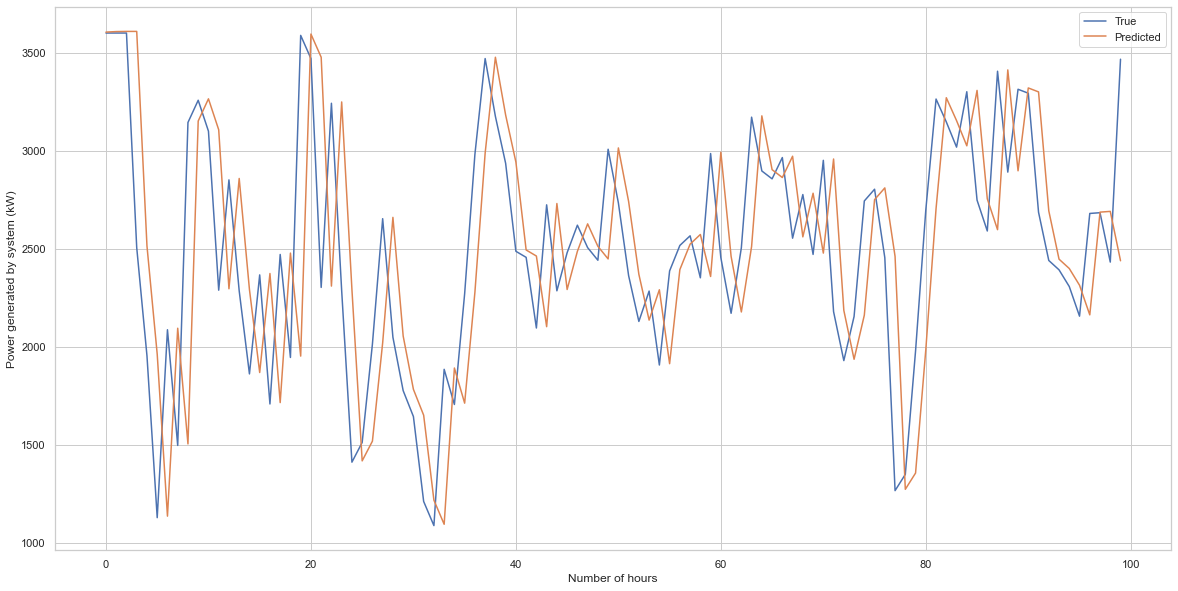

In [ ]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()